In [179]:
import numpy as np
import pandas as pd

# Importing Data

In [180]:
crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Asq Six Question to yourself

In [181]:
crop.shape

(2200, 8)

In [182]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [183]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [184]:
crop.duplicated().sum()

0

In [185]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Exploring Data

In [186]:
corr = crop.corr()
corr

C:\Users\regar\AppData\Local\Temp\ipykernel_1092\3631896629.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = crop.corr()


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

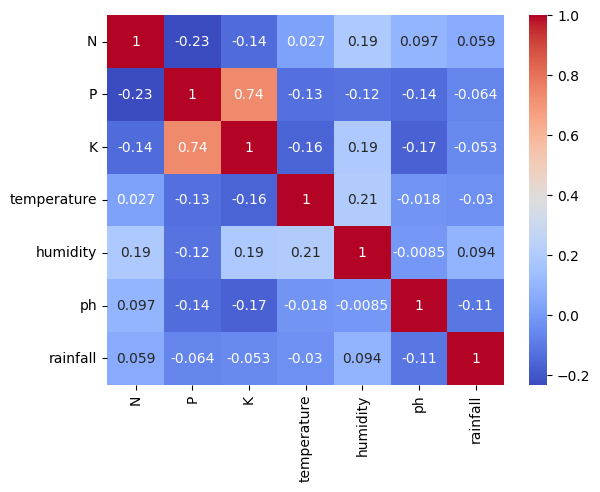

In [187]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm')

In [188]:
crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

C:\Users\regar\AppData\Local\Temp\ipykernel_1092\2091051290.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['N'])


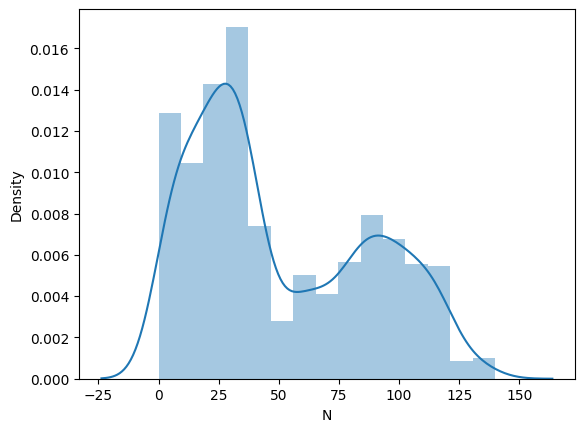

In [189]:
import matplotlib.pyplot as plt
sns.distplot(crop['N'])
plt.show()

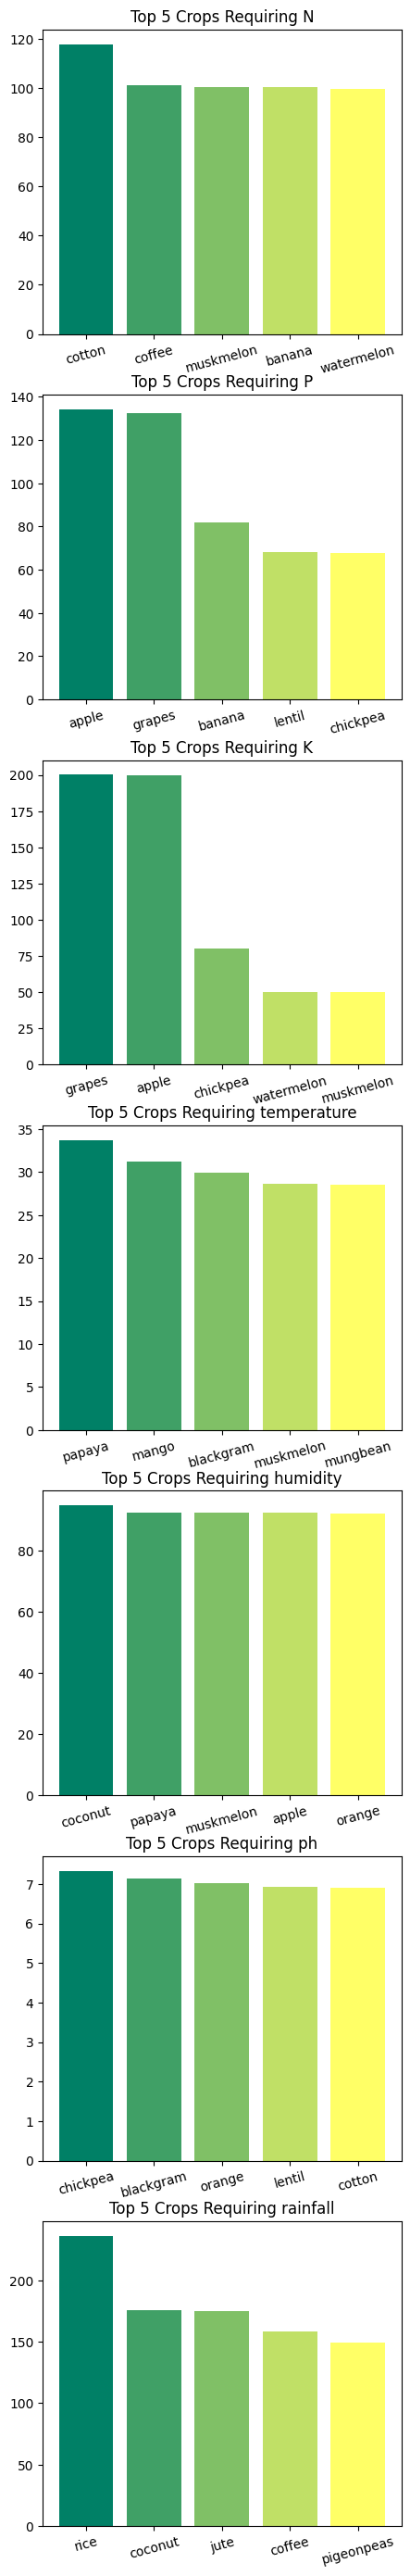

In [190]:
label_groupby = crop.groupby('label').mean().reset_index()
feature_columns = label_groupby.columns[1:]

num_rows = len(feature_columns)
num_cols = 1  

colors = plt.cm.summer(np.linspace(0, 1, 5))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5, 5 * num_rows))

for i, feature in enumerate(feature_columns):
    
    top_5_crops = label_groupby.sort_values(by=feature, ascending=False)[:5]

    if num_rows > 1:
        ax = axes[i]
    else:
        ax = axes
    
    ax.bar(top_5_crops['label'], top_5_crops[feature], color = colors)
    ax.tick_params(axis='x', rotation=15)
    ax.set_title(f'Top 5 Crops Requiring {feature}')


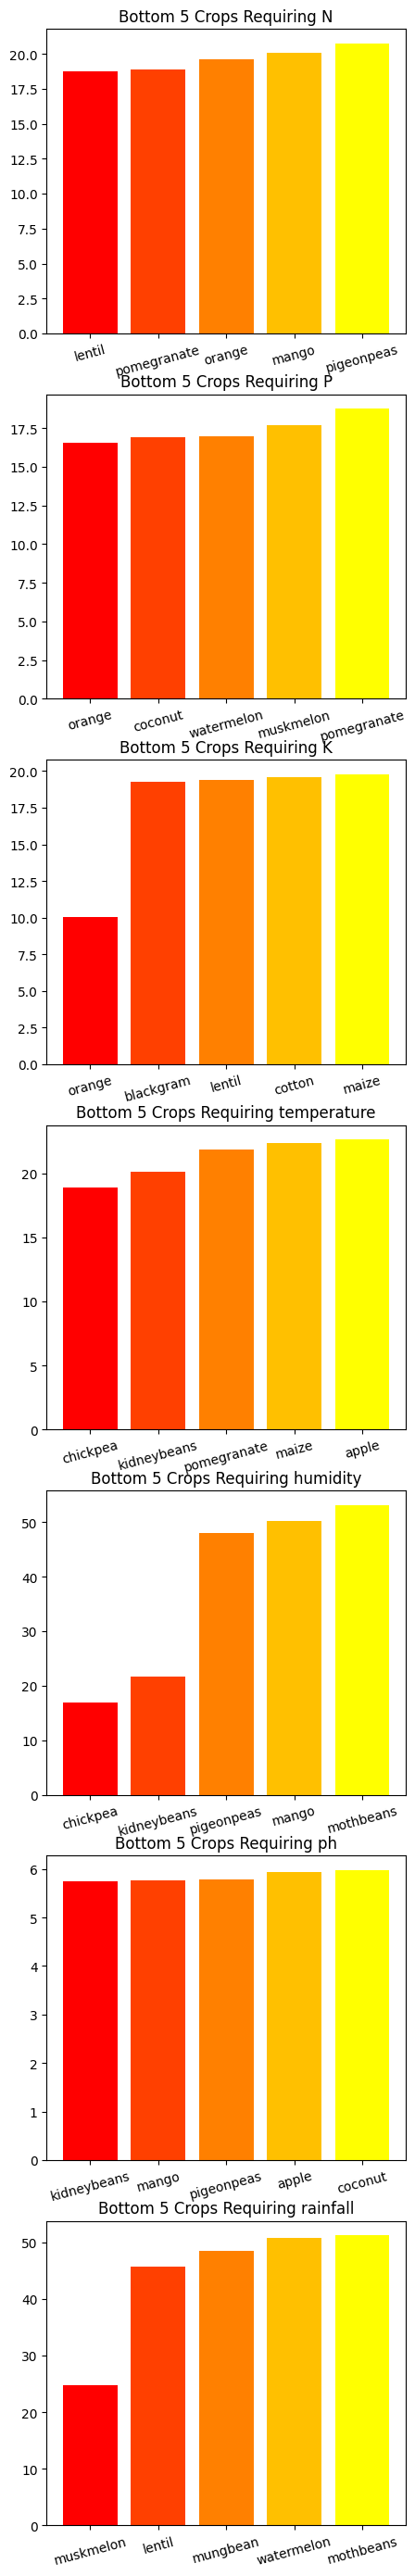

In [191]:
feature_columns = label_groupby.columns[1:]

num_rows = len(feature_columns)
num_cols = 1  

colors = plt.cm.autumn(np.linspace(0, 1, 5))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5, 5 * num_rows))

for i, feature in enumerate(feature_columns):
    
    bottom_5_crops = label_groupby.sort_values(by=feature, ascending=True)[:5]

    if num_rows > 1:
        ax = axes[i]
    else:
        ax = axes
    
    ax.bar(bottom_5_crops['label'], bottom_5_crops[feature], color = colors)
    ax.tick_params(axis='x', rotation=15)
    ax.set_title(f'Bottom 5 Crops Requiring {feature}')

# Encoding

In [192]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=crop['label'].map(crop_dict)

In [193]:
crop['crop_num'].value_counts()

1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: crop_num, dtype: int64

In [194]:
# crop.drop(['label'],axis=1,inplace=True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


# Train Test Split

In [195]:
X = crop.drop(['crop_num','label'],axis=1)
y = crop['crop_num']

In [196]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [197]:
y.shape

(2200,)

In [198]:
from sklearn.model_selection import train_test_split

In [199]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

In [200]:
X_train.shape

(1760, 7)

In [201]:
X_test.shape

(440, 7)

In [202]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
607,31,51,25,27.535929,85.570190,7.196774,53.018992
1512,13,126,204,23.109427,92.796308,6.383180,108.183792
1362,111,6,53,26.493065,88.591431,6.313513,46.063822
966,3,27,44,24.568112,92.030092,6.591303,110.963389
671,37,50,23,29.652969,88.485874,6.530471,56.019132
...,...,...,...,...,...,...,...
1208,6,123,203,12.756796,81.624974,6.130310,66.778446
422,16,55,19,19.543141,47.191883,6.413544,192.437219
1452,98,7,45,27.791618,92.510549,6.157725,26.854226
1483,83,15,49,28.927059,91.393568,6.438008,23.200767



# Scale the features using MinMaxScaler

In [203]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
607,31,51,25,27.535929,85.570190,7.196774,53.018992
1512,13,126,204,23.109427,92.796308,6.383180,108.183792
1362,111,6,53,26.493065,88.591431,6.313513,46.063822
966,3,27,44,24.568112,92.030092,6.591303,110.963389
671,37,50,23,29.652969,88.485874,6.530471,56.019132
...,...,...,...,...,...,...,...
1208,6,123,203,12.756796,81.624974,6.130310,66.778446
422,16,55,19,19.543141,47.191883,6.413544,192.437219
1452,98,7,45,27.791618,92.510549,6.157725,26.854226
1483,83,15,49,28.927059,91.393568,6.438008,23.200767


# Standarization

In [204]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
607,31,51,25,27.535929,85.570190,7.196774,53.018992
1512,13,126,204,23.109427,92.796308,6.383180,108.183792
1362,111,6,53,26.493065,88.591431,6.313513,46.063822
966,3,27,44,24.568112,92.030092,6.591303,110.963389
671,37,50,23,29.652969,88.485874,6.530471,56.019132
...,...,...,...,...,...,...,...
1208,6,123,203,12.756796,81.624974,6.130310,66.778446
422,16,55,19,19.543141,47.191883,6.413544,192.437219
1452,98,7,45,27.791618,92.510549,6.157725,26.854226
1483,83,15,49,28.927059,91.393568,6.438008,23.200767


# Training Models

In [205]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
md = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)



md.fit(X_train,y_train)
ypred = md.predict(X_test)
    
print(f"Random Forrest  with accuracy : {accuracy_score(y_test,ypred)}")

Random Forrest  with accuracy : 0.990909090909091


0.9954545454545455


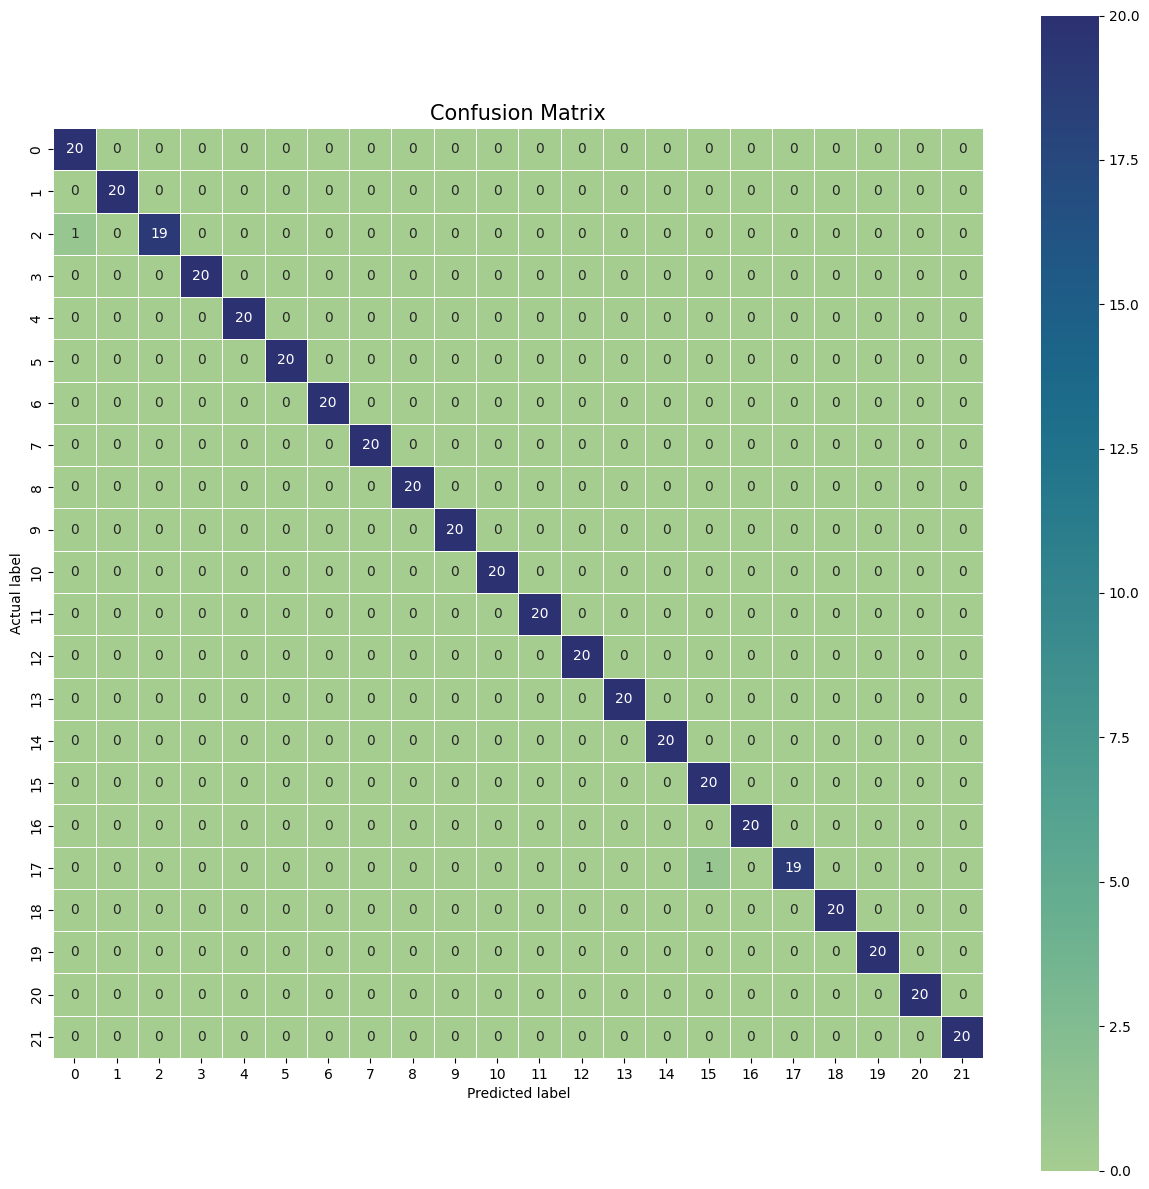

In [206]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
print(accuracy_score(y_test,ypred))

from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, ypred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap="crest")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size = 15)
plt.show()




# Predictive System

In [207]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    prediction = rfc.predict(features).reshape(1,-1)
    
    return prediction[0]

In [208]:
N = 34
P = 60
k = 9
temperature = 40.0
humidity = 20
ph = 6
rainfall = 100

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)


crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Kidneybeans is a best crop to be cultivated 


c:\Users\regar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [209]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))